In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from pprint import pprint
from varname import nameof
import matplotlib.pyplot as plt
import src.utils.index as utils
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [2]:
df = pd.read_csv("./src/data/diabetes_binary_health_indicators_BRFSS2015.csv")

In [3]:
display(f"Shape of the dataset (m=rows x n=columns): {df.shape}")
display("Data frame preview, first 20 rows: ")
df.head(20).T

'Shape of the dataset (m=rows x n=columns): (253680, 22)'

'Data frame preview, first 20 rows: '

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Diabetes_binary,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
HighBP,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
HighChol,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
CholCheck,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
BMI,40.0,25.0,28.0,27.0,24.0,25.0,30.0,25.0,30.0,24.0,25.0,34.0,26.0,28.0,33.0,33.0,21.0,23.0,23.0,28.0
Smoker,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
Stroke,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
HeartDiseaseorAttack,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PhysActivity,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
Fruits,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [4]:
columns = df.columns
columns_lst = columns.tolist() 
pprint(columns_lst)

['Diabetes_binary',
 'HighBP',
 'HighChol',
 'CholCheck',
 'BMI',
 'Smoker',
 'Stroke',
 'HeartDiseaseorAttack',
 'PhysActivity',
 'Fruits',
 'Veggies',
 'HvyAlcoholConsump',
 'AnyHealthcare',
 'NoDocbcCost',
 'GenHlth',
 'MentHlth',
 'PhysHlth',
 'DiffWalk',
 'Sex',
 'Age',
 'Education',
 'Income']


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [6]:
utils.unique_values_per_column(df)

,unique value count
Diabetes_binary,2
HighBP,2
HighChol,2
CholCheck,2
BMI,84
Smoker,2
Stroke,2
HeartDiseaseorAttack,2
PhysActivity,2
Fruits,2


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes_binary,253680.0,0.139333,0.346294,0.0,0.0,0.0,0.0,1.0
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0


In [8]:
duplicates_arr, duplicates_len = utils.duplicate_obs(df)
display(duplicates_arr.head(5).T, f"Number of duplicated rows: {duplicates_len}")

,1242,1563,2700,3160,3332
Diabetes_binary,1.0,0.0,0.0,0.0,0.0
HighBP,1.0,0.0,0.0,0.0,0.0
HighChol,1.0,0.0,0.0,0.0,0.0
CholCheck,1.0,1.0,1.0,1.0,1.0
BMI,27.0,21.0,32.0,21.0,24.0
Smoker,1.0,1.0,0.0,0.0,0.0
Stroke,0.0,0.0,0.0,0.0,0.0
HeartDiseaseorAttack,0.0,0.0,0.0,0.0,0.0
PhysActivity,0.0,1.0,1.0,1.0,1.0
Fruits,0.0,1.0,1.0,1.0,1.0


'Number of duplicated rows: 24206'

In [9]:
initial_obs = df.shape[0]
df.drop_duplicates(inplace=True)
final_obs = df.shape[0]
if initial_obs - final_obs == duplicates_len:
    print(f"Correctly removed duplicated obs totaling {duplicates_len}")

Correctly removed duplicated obs totaling 24206


In [10]:
df.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

array([[<AxesSubplot: title={'center': 'Diabetes_binary'}>,
        <AxesSubplot: title={'center': 'HighBP'}>,
        <AxesSubplot: title={'center': 'HighChol'}>,
        <AxesSubplot: title={'center': 'CholCheck'}>,
        <AxesSubplot: title={'center': 'BMI'}>],
       [<AxesSubplot: title={'center': 'Smoker'}>,
        <AxesSubplot: title={'center': 'Stroke'}>,
        <AxesSubplot: title={'center': 'HeartDiseaseorAttack'}>,
        <AxesSubplot: title={'center': 'PhysActivity'}>,
        <AxesSubplot: title={'center': 'Fruits'}>],
       [<AxesSubplot: title={'center': 'Veggies'}>,
        <AxesSubplot: title={'center': 'HvyAlcoholConsump'}>,
        <AxesSubplot: title={'center': 'AnyHealthcare'}>,
        <AxesSubplot: title={'center': 'NoDocbcCost'}>,
        <AxesSubplot: title={'center': 'GenHlth'}>],
       [<AxesSubplot: title={'center': 'MentHlth'}>,
        <AxesSubplot: title={'center': 'PhysHlth'}>,
        <AxesSubplot: title={'center': 'DiffWalk'}>,
        <AxesSubp

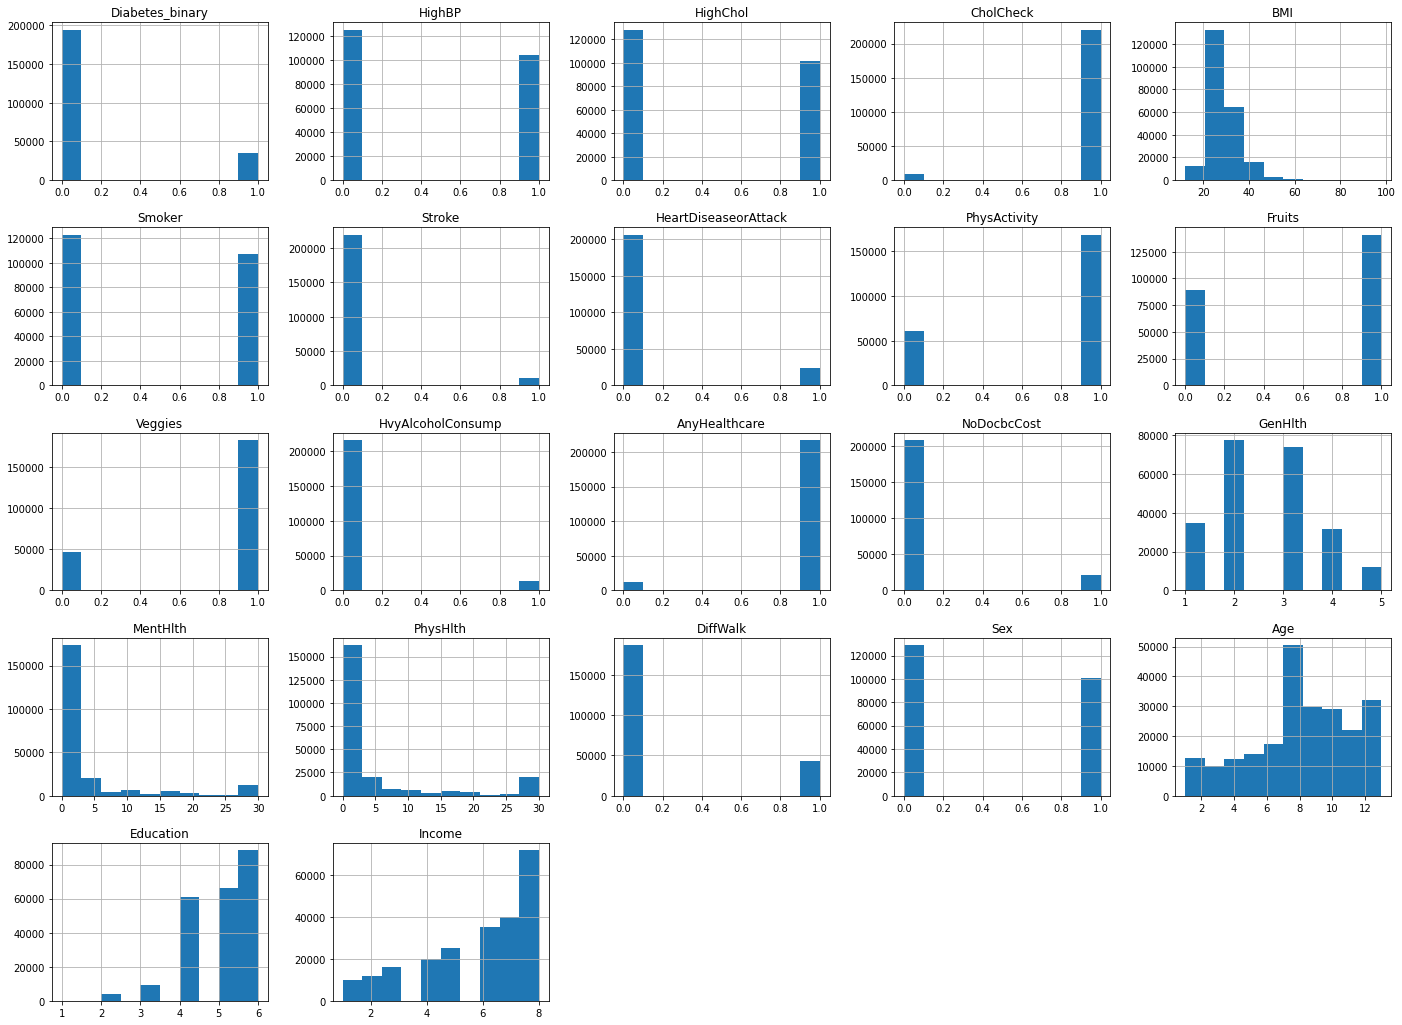

In [11]:
df.hist(figsize=(24,18))

<AxesSubplot: >

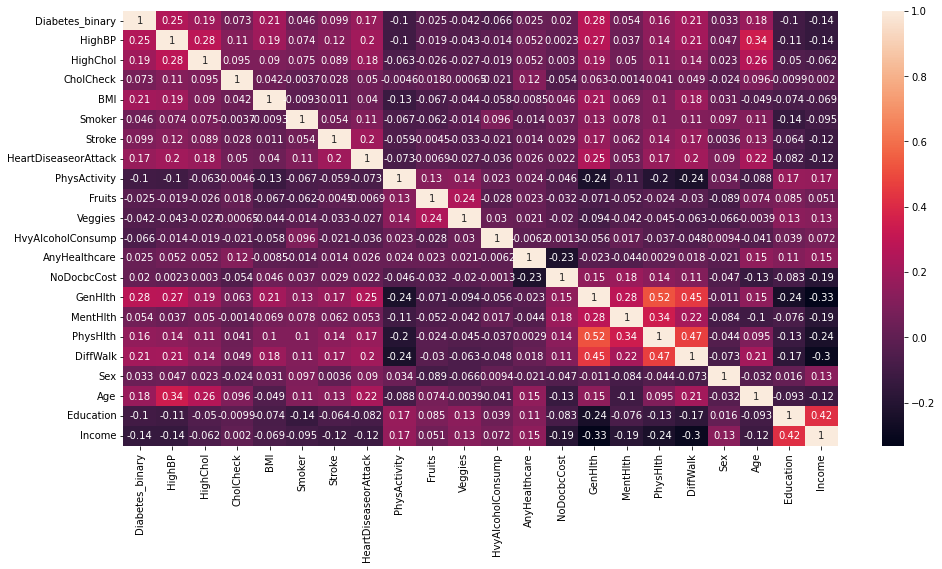

In [12]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(), annot=True)

In [17]:
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = utils.split_data(df, target="Diabetes_binary")

sets = [X_train, X_test, y_train, y_test]
sets_shape = []
for set in sets:
    sets_shape.append(set.shape)

print("X_train, X_test, y_train, y_test")
print(sets_shape)

# Benchmark models
models = {
    "Logistic Regression": LogisticRegression,
    "K Nearest Neighbors": KNeighborsClassifier
    }

lst_predictions_per_model = []
for name, model in models.items():
    model_prediction = utils.apply_benchmark_model(X_train, X_test, y_train, model)
    lst_predictions_per_model.append([f"{name}", model_prediction])

X_train, X_test, y_train, y_test
[(172105, 21), (57369, 21), (172105,), (57369,)]


C:\Users\diego\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
for prediction in lst_predictions_per_model:
    display(prediction[0])
    prediction = prediction[1]
    display(r2_score(y_test, prediction), mean_absolute_error(y_test, prediction), mean_squared_error(y_test, prediction, squared=False))

'Logistic Regression'

-0.17886525132647102

0.15368927469539298

0.3920322368063537

'K Nearest Neighbors'

-0.3128363278637427

0.1711551534801025

0.41370902030304163